In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

from pathlib import Path
slide_path = Path('../../../slides/figures/intro/')

In [215]:
writing = [((2021, 3, 26), (2021, 3, 31), " "), 
           ((2021,4, 1), (2021, 6, 13), "Vizweek short"), 
           ((2021,6,14), (2021, 7,12), "Scipy"), 
            ((2021,7,12), (2021, 10,1), "Dissertation"), 
            ((2021,10,1),(2022,3,31), "Dissertation/Vizweek (systems) paper"), 
            ((2022,3,31), (2022,6,1), "Dissertation")]

In [216]:
math = [((2021, 4, 1), (2021,5,31), 'addition'),
        ((2021, 6, 1), (2021, 6, 30), 'labeling'),
        ((2021, 7,1), (2021,9, 30), 'invariance'),
        ((2021, 10,1), (2021, 12, 31), 'interactivity')]

In [217]:
code = [((2021, 3,26), (2021,4,30), "image/table"), 
        ((2021, 5,1 ), (2021, 7, 30), "new artists"),
         ((2021, 7,1), (2021, 10, 31), "domain specific artists"),
         ((2021,10,1), (2022, 2 , 28), "composite (interactive) artists")]
    

In [218]:
blocks = [(writing, (0,1), '#CCC68D'),
          (code, (1,1), '#EEDD99'), 
         (math, (2,1), '#EEC290')]

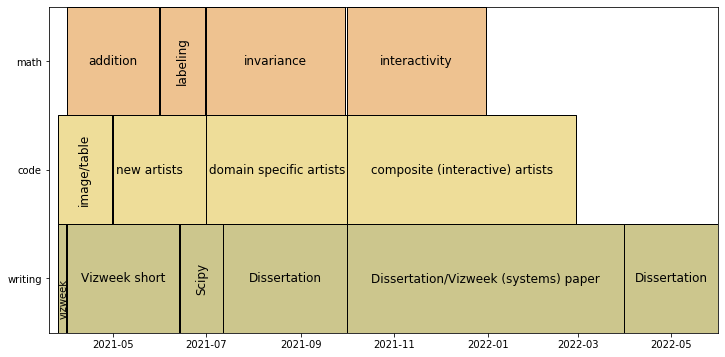

In [245]:
fig, ax = plt.subplots(figsize=(12,6))
for block, yrange, color in blocks:
    xranges = [(datetime(*s), datetime(*e)-datetime(*s)) for (s,e,_) in block]

    ax.broken_barh(xranges, yrange, edgecolors='k', facecolor=color)
    for (x,w), (_, _, l) in zip(xranges, block):
        if w < timedelta(days=60):
            ax.text(x+w/2, yrange[0]+.5, l, rotation=90, fontsize=12, va='center', ha='center')
            
        elif l not in ['new artists', 'domain specific artists']:
            ax.text(x + w/2,  yrange[0]+.5, l, ha='center', va='center', fontsize=12)
        else:
            ax.text(x + timedelta(days=2), yrange[0]+.5, l, fontsize = 12, ha='left', va='center')
#ax.broken_barh([(datetime(2021,12,31), datetime(2022, 6,1))],(1,2), edgecolor='white', color="white")
ax.text(datetime(*writing[0][0]) + timedelta(hours=15), 0.15, "vizweek", ha='left', rotation=90)
#ax.text(datetime(*writing[-1][0]) + timedelta(days=10),.5, "Dissertation",va='center', fontsize=12, rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,3,5,7,9,11]))
ax.set_xlim(datetime(2021,3,20), datetime(2022,6,1))
ax.set_ylim(0,3)
ax.set_yticks([.5, 1.5, 2.5,])
ax.set_yticklabels(['writing', 'code', 'math'])
fig.savefig(slide_path/"gantt.png")

In [199]:
math[0][0]

(2021, 4, 1)

In [28]:
xranges

[(datetime.datetime(2021, 3, 26, 0, 0), datetime.datetime(2021, 3, 31, 0, 0)),
 (datetime.datetime(2021, 4, 1, 0, 0), datetime.datetime(2021, 6, 13, 0, 0))]